# Preprocesamiento

## `groceries-dataset`

### Lectura de datos

In [1]:
import pandas as pd

df = pd.read_csv('data/groceries-dataset/Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


**Observaciones:**
- Este conjunto de datos nos muestra los productos comprados por separado, para un análisis apropiado puede convenir agrupar los productos en una sola observación, sin embargo, necesitamos asumir que las compras de un miembro dado en una fecha dada corresponde a la misma transacción para todos las transacciones donde los productos tengan los mismos Member_number y Date.

In [3]:
df.shape

(38765, 3)

### Preprocesamiento

In [4]:
for col in df.columns:
    isna_str = ""
    na_count_str = ""
    na_count = sum(df[col].isna())
    if na_count == 0:
        isna_str = "No "
    else:
        na_count_str = str(na_count)
    print(f"{isna_str}hay{na_count_str} valores faltantes en la columna '{col}'")

No hay valores faltantes en la columna 'Member_number'
No hay valores faltantes en la columna 'Date'
No hay valores faltantes en la columna 'itemDescription'


In [5]:
df_transactions = df.groupby(['Member_number','Date']).agg(' | '.join).reset_index()
df_transactions.columns = ['Member_number','Date', 'itemList']
df_transactions.head()

,Member_number,Date,itemList
0,1000,15-03-2015,sausage | whole milk | semi-finished bread | y...
1,1000,24-06-2014,whole milk | pastry | salty snack
2,1000,24-07-2015,canned beer | misc. beverages
3,1000,25-11-2015,sausage | hygiene articles
4,1000,27-05-2015,soda | pickled vegetables


In [6]:
df_transactions['itemCount'] = df_transactions['itemList'].apply(lambda x: len(x.split(' | ')))
df_transactions.head()

,Member_number,Date,itemList,itemCount
0,1000,15-03-2015,sausage | whole milk | semi-finished bread | y...,4
1,1000,24-06-2014,whole milk | pastry | salty snack,3
2,1000,24-07-2015,canned beer | misc. beverages,2
3,1000,25-11-2015,sausage | hygiene articles,2
4,1000,27-05-2015,soda | pickled vegetables,2


**Observaciones:**
- La transformación realizada disminuyó la cantidad de observaciones en el conjunto de datos
- Puede convenir analizar los nombres de productos por separado por lo que pueden simplemente listarse en otra estructura

In [7]:
df.shape , df_transactions.shape

((38765, 3), (14963, 4))

/Users/wilmerags/anaconda3/envs/dm_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='itemCount', ylabel='Count'>

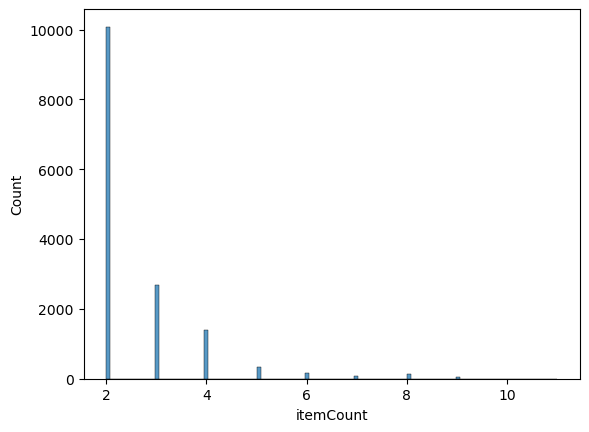

In [8]:
import seaborn as sns

sns.histplot(data=df_transactions, x="itemCount")

In [9]:
df_transactions["Date_month_year"] = df_transactions["Date"].apply(lambda x: x[3:])

In [10]:
pd.to_datetime(df['Date'])

/var/folders/s8/717qxpsd0zg6gl33gsm5y16m0000gn/T/ipykernel_8957/524101355.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  pd.to_datetime(df['Date'])


0       2015-07-21
1       2015-01-05
2       2015-09-19
3       2015-12-12
4       2015-02-01
           ...    
38760   2014-10-08
38761   2014-02-23
38762   2014-04-16
38763   2014-12-03
38764   2014-12-26
Name: Date, Length: 38765, dtype: datetime64[ns]

In [11]:
df_timediff = df.groupby(['itemDescription', 'Member_number']).agg(' | '.join).reset_index()
df_timediff["multiple_buys"] = df_timediff["Date"].apply(lambda x: len(x.split(' | ')))
df_timediff = df_timediff[df_timediff["multiple_buys"] > 2]
df_timediff

,itemDescription,Member_number,Date,multiple_buys
130,UHT-milk,1943,16-09-2014 | 16-09-2014 | 14-01-2015,3
702,beef,2178,26-01-2014 | 11-10-2014 | 03-05-2015,3
729,beef,2433,14-03-2015 | 23-08-2015 | 14-03-2015,3
768,beef,2743,05-05-2015 | 12-05-2014 | 09-08-2014,3
1537,beverages,4348,26-02-2015 | 11-04-2015 | 26-02-2015,3
...,...,...,...,...
34421,yogurt,3872,04-04-2014 | 23-08-2014 | 03-11-2015 | 04-04-2014,4
34460,yogurt,4018,17-11-2015 | 28-02-2014 | 17-11-2015,3
34585,yogurt,4515,16-04-2014 | 10-05-2015 | 10-05-2015,3
34673,yogurt,4829,03-11-2015 | 03-11-2015 | 03-11-2015,3


## `billboard-the-hot-100-songs`

### Lectura de datos

In [32]:
import pandas as pd

df = pd.read_csv('data/billboard-the-hot-100-songs/charts.csv')
df.head()

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18


In [61]:
for col in df.columns:
    isna_str = ""
    na_count_str = " "
    na_count = sum(df[col].isna())
    if na_count == 0:
        isna_str = "No "
    else:
        na_count_str = f" {na_count} "
    print(f"{isna_str}hay{na_count_str}valores faltantes en la columna '{col}'")

No hay valores faltantes en la columnas 'date'
No hay valores faltantes en la columnas 'rank'
No hay valores faltantes en la columnas 'song'
No hay valores faltantes en la columnas 'artist'
hay 32312 valores faltantes en la columnas 'last-week'
No hay valores faltantes en la columnas 'peak-rank'
No hay valores faltantes en la columnas 'weeks-on-board'


In [27]:
df['last-week']

0         1.0
1         2.0
2         3.0
3         4.0
4         5.0
         ... 
330082    NaN
330083    NaN
330084    NaN
330085    NaN
330086    NaN
Name: last-week, Length: 330087, dtype: float64

In [33]:
df['artist'] = df['artist'].apply(lambda x: x.split(' & '))
df['feat'] = df['artist'].apply(lambda x: len(x) > 1)

In [35]:
df_exploded = df.explode('artist')

In [37]:
set(df_exploded['artist'])

{'The Four Lads',
 'The Box Tops',
 'Nick Cannon Featuring R. Kelly',
 'Wilbert Harrison',
 'Fergie, Q-Tip',
 'Alison Krauss + Union Station',
 'ROSE',
 'Luke Combs Featuring Eric Church',
 'Daddy Dewdrop',
 'Gunna Featuring Travis Scott',
 'Maria Mena',
 'Vivian Green',
 'Vicki Lawrence',
 'Nino Tempo',
 'Bad Bunny Featuring Drake',
 'Flume Featuring Kai',
 'Slash',
 'Mario Vazquez',
 'Alias',
 'Shyheim',
 'Misty Morgan',
 'The Simon Sisters',
 'Cool Breeze Featuring OutKast, Goodie Mob',
 'Mary Travers',
 'Efti',
 'Tevin Campbell',
 'T.I. Featuring Lil Baby',
 'Paul Davis Feat. Susan Collins',
 'High School Musical Cast',
 'Kid Cudi, Skepta',
 'Young Money Featuring Lloyd',
 'Pitbull Featuring Christina Aguilera',
 'Tyler, The Creator Featuring DJ Drama',
 'The Electric Express',
 'Bonnie Raitt With Bryan Adams',
 'The Crampton Sisters',
 'Paris Hilton',
 'Donnie and The Dreamers',
 'Big Jay McNeely And Band',
 "Shakespear's Sister",
 '1927',
 'Bad Company',
 'Sharon Bryant',
 'LoveR

## `youtube-statistics`

In [44]:
import pandas as pd

df = pd.read_csv('data/youtube-statistics/videos-stats.csv')
df.head()

,Unnamed: 0,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0


In [45]:
df.shape

(1881, 8)

In [56]:
for col in df.columns:
    isna_str = ""
    na_count_str = " "
    na_count = sum(df[col].isna())
    if na_count == 0:
        isna_str = "No "
    else:
        na_count_str = f" {na_count} "
    print(f"{isna_str}hay{na_count_str}valores faltantes en la columna '{col}'")

No hay valores faltantes en la columna 'Unnamed: 0'
No hay valores faltantes en la columna 'Video ID'
hay 1 valores faltantes en la columna 'Comment'
No hay valores faltantes en la columna 'Likes'
No hay valores faltantes en la columna 'Sentiment'


In [47]:
df = df[(~df['Likes'].isna()) & (~df['Comments'].isna()) & (~df['Views'].isna())]
df

,Unnamed: 0,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0
...,...,...,...,...,...,...,...,...
1874,1874,Live Day 1- Introduction To Machine Learning A...,4UJelID_ICw,2022-02-01,machine learning,1861.0,184.0,37959.0
1875,1875,Complete Roadmap for Machine Learning | ML Roa...,T4MLrtOKPjY,2021-05-11,machine learning,9615.0,648.0,319957.0
1876,1876,Should You Learn Machine Learning?,AO6urf07KjE,2021-06-14,machine learning,10259.0,416.0,386360.0
1877,1877,Todos podemos aprender Machine learning,7ClLKBUvmRk,2017-10-08,machine learning,2981.0,72.0,431421.0


In [52]:
df = df.drop('Unnamed: 0', axis=1)
df

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0
...,...,...,...,...,...,...,...
1874,Live Day 1- Introduction To Machine Learning A...,4UJelID_ICw,2022-02-01,machine learning,1861.0,184.0,37959.0
1875,Complete Roadmap for Machine Learning | ML Roa...,T4MLrtOKPjY,2021-05-11,machine learning,9615.0,648.0,319957.0
1876,Should You Learn Machine Learning?,AO6urf07KjE,2021-06-14,machine learning,10259.0,416.0,386360.0
1877,Todos podemos aprender Machine learning,7ClLKBUvmRk,2017-10-08,machine learning,2981.0,72.0,431421.0


In [54]:
set(df['Keyword'])

{'animals',
 'apple',
 'asmr',
 'bed',
 'biology',
 'business',
 'chess',
 'cnn',
 'computer science',
 'crypto',
 'cubes',
 'data science',
 'education',
 'finance',
 'food',
 'game development',
 'gaming',
 'google',
 'history',
 'how-to',
 'interview',
 'literature',
 'lofi',
 'machine learning',
 'marvel',
 'mathchemistry',
 'minecraft',
 'movies',
 'mrbeast',
 'mukbang',
 'music',
 'news',
 'nintendo',
 'physics',
 'reaction',
 'sat',
 'sports',
 'tech',
 'trolling',
 'tutorial',
 'xbox'}

In [55]:
df = pd.read_csv('data/youtube-statistics/comments.csv')
df.head()

,Unnamed: 0,Video ID,Comment,Likes,Sentiment
0,0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0
3,3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


## `jackdaoud/animal-shelter-analytics`

In [57]:
import pandas as pd

df = pd.read_csv('data/animal-shelter-analytics/Austin_Animal_Center_Intakes.csv')
df.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


In [58]:
for col in df.columns:
    isna_str = ""
    na_count_str = " "
    na_count = sum(df[col].isna())
    if na_count == 0:
        isna_str = "No "
    else:
        na_count_str = f" {na_count} "
    print(f"{isna_str}hay{na_count_str}valores faltantes en la columna '{col}'")

No hay valores faltantes en la columna 'Animal ID'
hay 39051 valores faltantes en la columna 'Name'
No hay valores faltantes en la columna 'DateTime'
No hay valores faltantes en la columna 'MonthYear'
No hay valores faltantes en la columna 'Found Location'
No hay valores faltantes en la columna 'Intake Type'
No hay valores faltantes en la columna 'Intake Condition'
No hay valores faltantes en la columna 'Animal Type'
hay 1 valores faltantes en la columna 'Sex upon Intake'
No hay valores faltantes en la columna 'Age upon Intake'
No hay valores faltantes en la columna 'Breed'
No hay valores faltantes en la columna 'Color'


In [59]:
df.shape

(124120, 12)

In [84]:
set(df['Age upon Intake'].apply(lambda x: x.split(' ')[-1]))

{'day', 'days', 'month', 'months', 'week', 'weeks', 'year', 'years'}

In [94]:
conversion_age_map = {
    "months": {
        "days": 28,
        "months": 1,
        "weeks": 4,
        "years": 12**-1
    },
    "days": {
        "days": 1,
        "months": 28**-1,
        "weeks": 7**-1,
        "years": 365**-1
    },
    "weeks": {
        "days": 7,
        "months": 4**-1,
        "weeks": 1,
        "years": 52.14**-1
    },
    "years": {
        "days": 365,
        "months": 12,
        "weeks": 52.14,
        "years": 1
    },   
}
def calculate_age(age_str: str, age_unit: str = 'months') -> float:
    qty, unit = age_str.split(' ')
    if unit[-1] != 's':
        unit += 's'
    return int(qty) * conversion_age_map[unit][age_unit]

df['Age upon Intake_months'] =  df['Age upon Intake'].apply(lambda x: calculate_age(x, "months"))

/Users/wilmerags/anaconda3/envs/dm_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age upon Intake_months', ylabel='Density'>

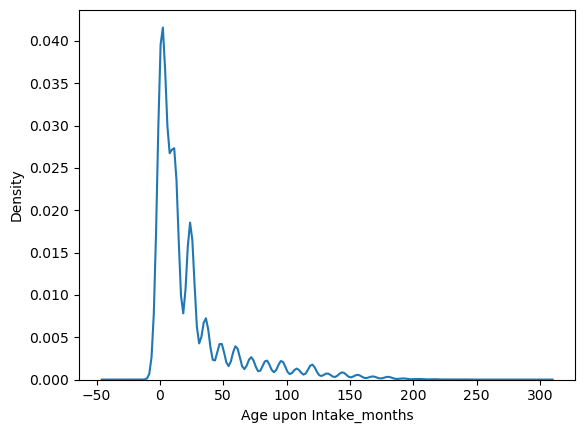

In [95]:
sns.kdeplot(df, x='Age upon Intake_months')

In [99]:
sum(df['Breed'].apply(lambda x: x.split(' ')[-1].lower() == "mix")), 124120 - 90768

(90768, 33352)

In [105]:
df['Sex upon Intake'] = df['Sex upon Intake'].fillna('Unknown')

In [109]:
set(df["Sex upon Intake"].apply(lambda x: x.split()[0]))

{'Intact', 'Neutered', 'Spayed', 'Unknown'}

## Ejemplo de standardization

In [2]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

scaler = preprocessing.StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [3]:
from sklearn.pipeline import Pipeline


pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC()),
])

(array([1.        , 0.        , 0.33333333]),
 array([0.81649658, 0.81649658, 1.24721913]))